In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Stability of ODE integrators

In the following, we analyze the numerical solution of a simple one-dimensional harmonic oscillator using the Forward Euler method. We analyzed in class the stability properties of this method, and also analyzed the development of phase errors. Here we will verify the results of our numerical analysis by implementing and solving the harmonic oscillator using Forward-Euler.

This is the equation of motion for the harmonic oscillator:

\begin{eqnarray}
\frac{d^2 x}{dt^2} = -\omega_0^2 x
\end{eqnarray}

Which can be expressed as a coupled set of 1st-order ODEs:


\begin{eqnarray}
\frac{dx}{dt} &=& v  \\
\frac{dv}{dt} &=& -\omega_0^2 x
\end{eqnarray}

The solution for this system of equations is:

\begin{eqnarray}
x(t) &=& Re[\bar{x_0} e^{i\omega_0 t}]  \\
v(t) &=& Re[\bar{v_0} e^{i\omega_0 t}] = Re[i\omega_0 \bar{x_0} e^{i\omega_0 t}]
\end{eqnarray}
which can also be written as:
\begin{eqnarray}
x(t) &=& x_0 \mathrm{cos}(\omega_0t) + v_0/\omega_0 \mathrm{sin}(\omega_0t)\\
v(t) &=& v_0 \mathrm{cos}(\omega_0t) - x_0\omega_0 \mathrm{sin}(\omega_0t),
\end{eqnarray}
where $x_0 = x(t=0)$ and $v_0 = v(t=0)$ are initial conditions.

## Forward Euler method

The Forward-Euler discretization of the system of equations of our harmonic oscillator is:
\begin{eqnarray}
x_{n+1} &=& x_n + \Delta t v_n  \\
v_{n+1} &=& v_n - \Delta t\omega_0^2 x_n
\end{eqnarray}

In [3]:
def forward_euler_step(x_n, v_n, omega_0, dt):
    x_np1 = x_n + dt*v_n
    v_np1 = v_n - dt*(omega_0**2)*x_n
    
    return x_np1, v_np1
    
def integrate_harmonic_oscillator(x_0, v_0, omega_0, dt, T):
    
    N = int(T/dt)
    t = [0]
    
    x = np.zeros(N)
    v = np.zeros(N)
    
    x[0] = x_0
    v[0] = v_0
    
    for n in range(0,N-1):
        x[n+1], v[n+1] = forward_euler_step(x[n], v[n], omega_0, dt)
        t.append((n+1)*dt)
    
    # convert to numpy arrays
    t = np.array(t)
    x = np.array(x)
    v = np.array(v)
    
    return t, x, v

def analytical_solution(x_0, v_0, omega_0, dt, T):
    N = int(T/dt)
    t = np.arange(N)*dt
    
    x = x_0*np.cos(omega_0*t) + v_0/omega_0 *np.sin(omega_0*t)
    v = v_0*np.cos(omega_0*t) - x_0*omega_0 *np.sin(omega_0*t)
    
    return t, x, v

### 1. Numerical Convergence 

We will now do the numerical integration of the equation of motion for the harmonic oscillator using the Forward Euler method and compare the "numerical solution" obtained with that of the true analytical solution.

Specific parameters to use: x_0 = 1, and y_0 = 1, and omega_0 = 1. Set the numerical timestep to dt = 0.1, and integrate the equations up to time T = 16$\pi$. Overlay the numerical solution $x_\mathrm{num}(t)$ with $x_\mathrm{analytic}(t)$, and the same for $v_(t)$ with $v_\mathrm{analytic}(t)$. 

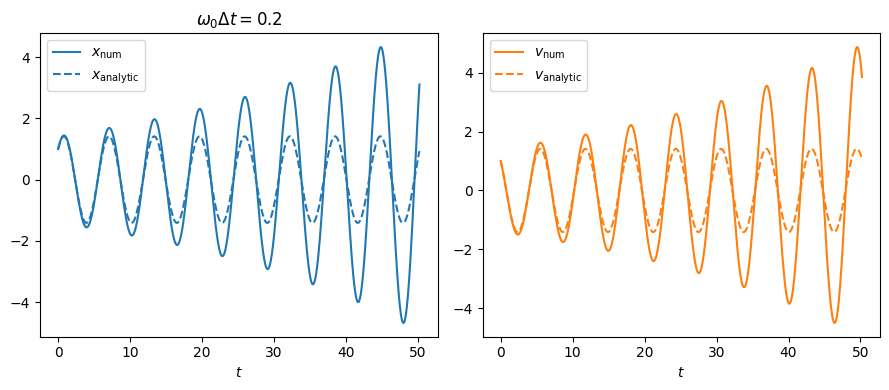

In [4]:
dt = 0.05
omega_0 = 1
x_0 = 1
v_0 = 1
T = 8*2*np.pi


t, x_num, v_num = integrate_harmonic_oscillator(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = dt, T = T)
t, x_analytic, v_analytic = analytical_solution(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = dt, T = T)

plt.figure(figsize = (9,4))
plt.subplot(1,2,1)
plt.title('$\omega_0 \Delta t = 0.2$')
plt.plot(t, x_num, c = 'C0', label = r'$x_\mathrm{num}$')
plt.plot(t, x_analytic, c = 'C0', ls = '--', label = r'$x_\mathrm{analytic}$')
plt.xlabel(r'$t$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(t, v_num, c = 'C1', label = r'$v_\mathrm{num}$')
plt.plot(t, v_analytic, c = 'C1', ls = '--', label = r'$v_\mathrm{analytic}$')
plt.xlabel(r'$t$')
plt.legend()

plt.tight_layout()

1.1. Comment on the qualitative differences do you see between the numerical solution, and the analytical solution?

1.2. Set dt = 0.05 (half of the original dt). How do the results change when we change dt? Are the results more accurate?

1.3. Let us define the accuracy of our numerical solution as the difference between the numerical estimate of the position of the oscillator and its analytical value at time $t = T = 16\pi$: 

$\epsilon \equiv x_{n}(t=T) - x_\mathrm{analytical}(t=T)$.

How does $\epsilon$ scale with $dt$? Calculate this \epsilon for different values of dt (between the range 10^-4 and 10^-1), and plot $\epsilon$ vs $dt$. You should plot this on a log-log scale. What is the slope of the curve? What does that tell you about the order of the Forward-Euler method?

In [5]:
t, x, v = integrate_harmonic_oscillator(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = dt, T = T)
t, x_analytic, v_analytic = analytical_solution(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = dt, T = T)
dx_dt1 = x[-1]-x_analytic[-1]

t, x, v = integrate_harmonic_oscillator(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = 0.5*dt, T = T)
t, x_analytic, v_analytic = analytical_solution(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = 0.5*dt, T = T)
dx_dt2 = x[-1]-x_analytic[-1]

t, x, v = integrate_harmonic_oscillator(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = 0.25*dt, T = T)
t, x_analytic, v_analytic = analytical_solution(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = 0.25*dt, T = T)
dx_dt3 = x[-1]-x_analytic[-1]

t, x, v = integrate_harmonic_oscillator(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = 0.001*dt, T = T)
t, x_analytic, v_analytic = analytical_solution(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = 0.001*dt, T = T)
dx_dt4 = x[-1]-x_analytic[-1]

print(dx_dt1, dx_dt2, dx_dt3, dx_dt4)

2.174884711673464 0.8166207612384898 0.3595435103581649 0.0012572792627835172


### 2. Numerical stability and phase errors

The previous exercise showed that the Forward Euler method was giving rise to a solution where the harmonic oscillator was increasing its amplitude over time. The rate at which this increases is dependent on the time step $\Delta t$. This is the first indication that this behavior is not physical. It is numerical! If your results depend on the choice of numerical parameters such as $\Delta t$, then it is a numerical effect and not a physical effect! It also suggests that your results have not numerically converged. When they have converged, the character of your solution will no longer change with dt. You can then be more confident that you will have obtained a physical result.

In class, we did some numerical analysis of the Forward Euler method and showed that it was unconditionally unstable. Indeed, this instability is what is giving rise to the unphysical growth in the oscillation amplitude that we observed in Part 1. In class we also calculated the "numerical frequency" of oscillation of our oscillator that would be obtained by the Forward Euler method. 

This "numerical frequency" we calculated was:

\begin{eqnarray}
\omega_{num} = - i \frac{i}{\Delta t}~\mathrm{log}(1+i\omega_0\Delta t).
\end{eqnarray}

This expression is a bit difficult to interpret, so we analyzed this expression for $\omega_0\Delta t << 1$ (small time step limit):

\begin{eqnarray}
\omega_{num} = \omega_0(1-\frac{\omega_0^2\Delta t^2}{3} - i\frac{\omega_0\Delta t}{2}) + \mathcal{O}(\Delta t^3).
\end{eqnarray}

This result shows that when $\Delta t \rightarrow 0$ (time-continous limit), the "numerical frequency" ($\omega_{num}$) tends to the physical frequency ($\omega_0$), meaning that we have a consistent numerical algorithm. But for finite $\Delta t$, which we must us in our numerical calculations (we cannot take infinitesimally small time steps on our computer), we will be making small errors that will result in a modified behavior of the oscillation frequnecy of our oscillator. In particular we have two types of errors: an error in the real part of the frequency (that result in "phase errors"), and an error in the imaginary part of the frequency (which gives rise to instability).

The numerical solution of the oscillator position can therefore be written as:

\begin{eqnarray}
x_{num}(n \Delta t) &=& \mathrm{Re}\left ( \bar{x_0} e^{i \omega_{num} n \Delta t}\right) \\
                    &=& \mathrm{Re}\left ( \bar{x_0} e^{i (\omega_{num,R} + i\omega_{num,I}) n \Delta t}\right) \\
                    &=& \mathrm{Re}\left ( \bar{x_0} e^{i \omega_{num,R} n \Delta t} e^{-\omega_{num,I} n\Delta t}\right) \\
                    &=& \left ( x_{0} \mathrm{cos}(\omega_{num,R} n \Delta t) + v_0/\omega_0\mathrm{sin}(\omega_{num,R} n \Delta t) \right) e^{-\omega_{num,I} n\Delta t},
\end{eqnarray}

where, to lowest order in $\Delta t$, $\omega_{num,R} = \omega_0 (1-(\omega_0 \Delta t)^2 / 3)$ and $\omega_{num,I} = -\omega_0 (\omega_0 \Delta t / 2)$. Notice that $\omega_{num,I}<0$ for finite $\Delta t$, which means there will be positive growth (instability) of the numerical solution.

Below, we will verify that the numerical solution we obtained in Part 1 is consistent with our numerical analysis. In particular, we will verify that the growth of the amplitude is indeed exponential and we will compare the growth rate with $\omega_{num,I}$, and we will also verify that the real part of the frequency is modified.

#### 2.1. Verifying exponential growth of the solution and comparing with numerical growth rate from our numerical analysis.

Below we calcualte the motion of the oscillator using the Forward Euler method for the physical parameters $\omega_0 = 1$, $x_0 = 1$, $v_0=1$. We use the time step $\Delta t = 0.1$; note that if $\omega_0 = 1$, the period of oscillation is $\tau = 2\pi/\omega_0 = 2\pi$, which means that $\tau/dt \sim 60$, i.e. we are resolving a period of oscillation with $60$ time steps. This is typically a good resolution.

In [6]:
dt = 0.1
omega_0 = 1
x_0 = 1
v_0 = 1
T = 16*2*np.pi

t, x_num, v_num = integrate_harmonic_oscillator(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = dt, T = T)

We now plot the numerical solution of the position of the oscillator as a function of time. We plot this in two ways: in a linear scale and in a logarithmic scale. In the linear scale, you will see that the oscillator amplitude grows in time, but it is not immediately clear what type of growth we are seeing (polynomial? exponential?). The type of growth we have becomes clear when we plot the oscillator amplitude in a logarithmic scale. In that case we see, that the logarithm of the amplitude of the oscillator grows linearly in time. In otherwords, the amplitude of the oscillator grows exponentially in time, which is consistent with the behavior we found in our numerical analysis.

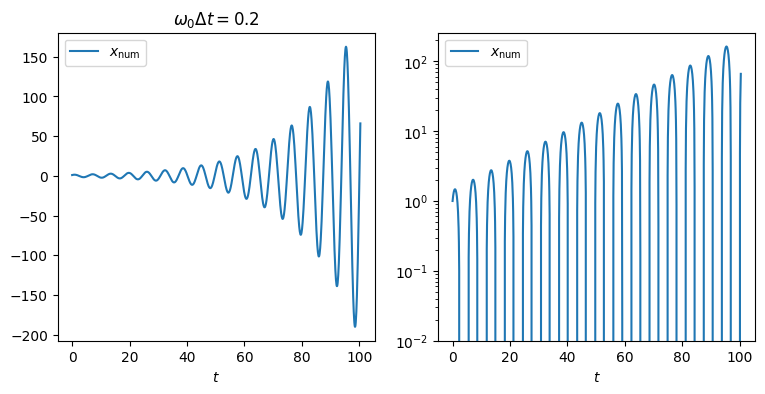

In [7]:
plt.figure(figsize = (9,4))
plt.subplot(1,2,1)
plt.title('$\omega_0 \Delta t = 0.2$')
plt.plot(t, x_num, c = 'C0', label = r'$x_\mathrm{num}$')
# plt.plot(t, v_num, c = 'C1', label = r'$v_\mathrm{num}$')
plt.xlabel(r'$t$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(t, x_num, c = 'C0', label = r'$x_\mathrm{num}$')
# plt.plot(t, v_num, c = 'C1', label = r'$v_\mathrm{num}$')
plt.xlabel(r'$t$')
plt.yscale('log')
plt.ylim(1e-2,)
plt.legend()


But what is the growth rate of this exponential growth? In our numerical analysis, we found that the amplitude would grow as $\sim e^{-\omega_{num,I} n\Delta t}$, where $\omega_{num,I}$ is the imaginary part of the "numerical frequency" (i.e. the frequency of oscillation of our numerical solution). Again, we showed that $\omega_{n,I}<0$, which means that we will have exponential growth (the exponent of the exponential is positive), $\sim e^{+|\omega_{num,I}|n\Delta t}$. So $|\omega_{num,I}|$ is the growth rate of our exponential! Let us see if the growth of our numerical solution indeed $|\omega_{num,I}|$.

Recall that $|\omega_{num,I}| \simeq \omega_0 \frac{\omega_0\Delta t}{2}$ (to lowest order in $\Delta t$).

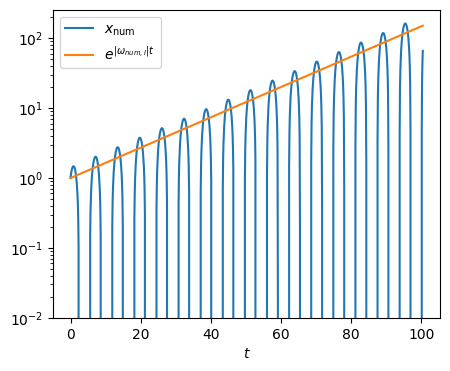

In [8]:
omega_num_I = omega_0**2  * dt / 2

plt.figure(figsize = (5,4))
plt.plot(t, x_num, c = 'C0', label = r'$x_\mathrm{num}$')
plt.plot(t, np.exp(omega_num_I * t), c = 'C1', label = r'$e^{|\omega_{num,I}| t}$')
plt.xlabel(r'$t$')
plt.yscale('log')
plt.ylim(1e-2,)
plt.legend()

The plot above confirms that the numerical rate of growth of the position of the oscillator is $\omega_{num,I}$! If we lower $\Delta t$, we will lower this numerical (artificial/unphysical) growth of this solution. 

Important: recall that this growth rate that we are seeing and that we calculated is specific to the numerical method we are using (Forward Euler method). Other methods will have different behavior. They may or may not be unstable, with different growth/damping rates, depending on the details of how we discretize the equation!

#### 2.2. Verifying the accumulation of phase errors (errors in the real part of the numerical frequency)

Our numerical analysis of the numerical oscillator problem using the Forward Euler method showed that in addition to exponential growth of the amplitude of the oscillation (associated with the imaginary part of the "numerical frequency"), there is also a difference in the actual frequency of oscillation of our numerical solution compared to the physical frequency. This is connected to the real part of the numerical frequency, $\omega_{num,R} \simeq \omega_0(1-\frac{\omega_0^2\Delta t^2}{3})$ (to lowest order in $\Delta t$). This is close to $\omega_0$, but has a tiny correction associated with the time step $\Delta t$.

We can directly compute the size of this error for the physical and numerical parameters we used above ($\omega_0 = 1$ and $\Delta t = 0.1$), which givus us $\omega_{num,R} \simeq 0.996667 \omega_0$, which is slightly slower than the physical $\omega_0$. This error will lead to the build up of an error in the phase of the oscillator over time. Indeed the phase of oscillation is given by $\phi_(t) = \int_0^t{\omega ~dt}$.

Let us see this directly in our numerical solution. We compute both the numerical and analytical solution so we can compare.

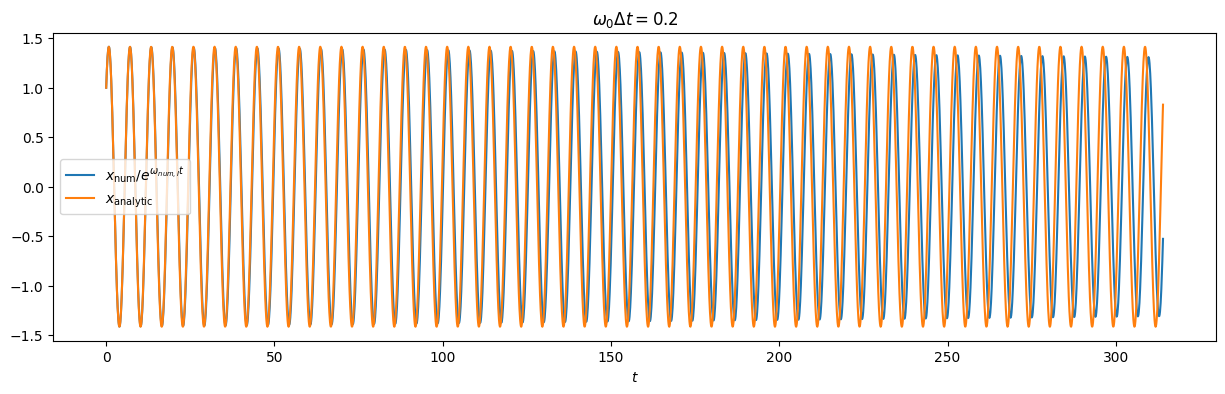

In [9]:
dt = 0.1
omega_0 = 1
x_0 = 1
v_0 = 1
T = 50*2*np.pi

omega_num_I = omega_0**2  * dt / 2

t, x_num, v_num = integrate_harmonic_oscillator(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = dt, T = T)
t, x_analytic, v_analytic = analytical_solution(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = dt, T = T)


plt.figure(figsize = (15,4))
plt.title('$\omega_0 \Delta t = 0.2$')
plt.plot(t, x_num/np.exp(omega_num_I*t), c = 'C0', label = r'$x_\mathrm{num}/e^{\omega_{num,I}t}$')
plt.plot(t, x_analytic, c = 'C1', label = r'$x_\mathrm{analytic}$')
plt.xlabel(r'$t$')
plt.legend()


The figure above shows that after 50 oscillation periods, our numerical solution of the oscillator is lagging behind the true, physical solution of the oscillator. (Note that I have divided the numerical solution by the exponential growth factor so that it looks like we are preserving the amplitude and this allows us to see more clearly what is happening to the phase of oscillation).

For many problems of interest, this phase error may be very problematic. For instance, if you are trying to understand if/when an orbiting object in space will collide with another orbiting object in space, accurately capturing the phase of the orbit of each object is critical. And since this collision may only occur after many orbital periods (hundreds? thousands? millions?), we need to accurately model the phase over long integration times.

### Suggested further work:
Repeat the steps above for the Backward Euler method. You will see damping instead of exponential growth. It is important to see it with your own eyes :) 

## Leap-Frog method

The Leap-Frog method uses a centered finite difference discretization of the time derivatives, and defines the position ($x$) and velocity ($v$) of the oscillator in a staggered arrangement in time. More specifically, the position $x$ is known as integer multiples of $\Delta t$:
\begin{eqnarray}
x(n \Delta t) \equiv x_n
\end{eqnarray}
and the velocity $v$ is known at semi-integer multiples of $\Delta t$:
\begin{eqnarray}
v((n+1/2) \Delta t) \equiv v_{n+1/2}.
\end{eqnarray}

This allows us to write the discretized Leap-Frog update equations for the harmonic oscillator:
\begin{eqnarray}
x_{n+1} &=& x_n + \Delta t v_{n+1/2}  \\
v_{n+3/2} &=& v_{n+1/2} - \Delta t\omega_0^2 x_{n+1}.
\end{eqnarray}

First, notice that both equations above are using a time-centered discretization of the time derivative.
\begin{eqnarray}
\frac{x_{n+1}-x_{n}}{\Delta t} &=& \frac{dx}{dt}_{n+1/2} + \mathcal{O}(\Delta t^2)  = v_{n+1/2} + \mathcal{O}(\Delta t^2)\\
\frac{v_{n+3/2}-v_{n+1/2}}{\Delta t} &=& \frac{dv}{dt}_{n+1} + \mathcal{O}(\Delta t^2)  = -\omega_0^2 x_{n+1} + \mathcal{O}(\Delta t^2)\\
\end{eqnarray}

which, means that the leap frog equations have a local error of $\mathcal{O}(\Delta t^3)$:

\begin{eqnarray}
x_{n+1} &=& x_n + \Delta t v_{n+1/2}  + \mathcal{O}(\Delta t^3)\\
v_{n+3/2} &=& v_{n+1/2} - \Delta t\omega_0^2 x_{n+1} + \mathcal{O}(\Delta t^3).
\end{eqnarray}

The global error of the leap-frog method will be $\mathcal{O}(\Delta t^2)$. These errors are an order $\Delta t$ better than the Forward Euler method we saw earlier.

Second, the update equations may look a bit strange because of the time-staggering of $x$ and $v$. But notice that if you happen to have $x_n$ and $v_{n+1/2}$ (i.e. information about the current position of the oscillator and its velocity half a time step ahead), then you can update the position to the next time step ($x_{n+1}$), and then use that updated position to update the velocity to the next time step $v_{n+3/2}$. And you can continue to repeat this indefinitely. This scheme is called the leap frog because each variable jumps over the other in a sequentially manner:
$x_{n} \rightarrow_{v_{n+1/2}} x_{n+1}$, followed by $v_{n+1/2} \rightarrow_{x_{n+1}} v_{n+3/2}$, followed by $x_{n+1} \rightarrow_{v_{n+3/2}} x_{n+2}$ and so on.

So how we start the leap-frog method? When we provide initial conditions, we often provide them at $t=0$ as $x_0 = x(t=0)$ and $v_0 = v(t=0)$. But to start the leap-frog algorithm, we need $x_0(t=0)$ (which we have) and $v_{1/2} = v(t=\Delta t/2)$. To get $v_{1/2}$ we can use an $RK2$ method to advance $v$ by half a time step from $v_0$ to $v_{1/2}$:

\begin{eqnarray}
v_{1/2} &=& v_{0} + \frac{\Delta t}{2} k2 \\
k2 & = & -\omega_0^2 (x_0+\frac{\Delta t}{4} k1) \\
k1 & = & -\omega_0^2 x_0.
\end{eqnarray}

This first half-time step will have a local error $\mathcal{O}(\Delta t^3)$, which is the same order of the rest of the leap-frog method. With this first half-step, you now have both $x_0$ and $v_{1/2}$ and can start the leap-frog algorithm.

Let us see this in action below.

In [10]:
def leapfrog_step(x_n, v_nph, omega_0, dt):
    x_np1 = x_n + dt*v_nph
    v_np3h = v_nph - dt*(omega_0**2)*x_np1
    
    return x_np1, v_np3h

def RK2_half_dt_step_for_v(v_0, x_0, omega_0, dt):
    k1 = -omega_0**2 * x_0
    k2 = -omega_0**2 * (x_0 + dt/4 * k1)
    v_h = v_0 + dt/2*k2
    
    return v_h
    
def integrate_harmonic_oscillator_LF(x_0, v_0, omega_0, dt, T):
    
    N = int(T/dt)
    t_x = [0] # time array for x
    t_v = [0.5] # time array for v (this array will be dt/2 ahead of the x array)
    
    x = np.zeros(N)
    v = np.zeros(N)
    
    x[0] = x_0
    v[0] = RK2_half_dt_step_for_v(v_0, x_0, omega_0, dt) # first element in v array will be v_{1/2}, obtained by the half RK2 push
    
    for n in range(0,N-1):
        x[n+1], v[n+1] = leapfrog_step(x[n], v[n], omega_0, dt)
        t_x.append((n+1)*dt)
        t_v.append((n+3/2)*dt)
    
    # convert to numpy arrays
    t_x = np.array(t_x)
    t_v = np.array(t_v)
    x = np.array(x)
    v = np.array(v)
    
    return t_x, t_v, x, v

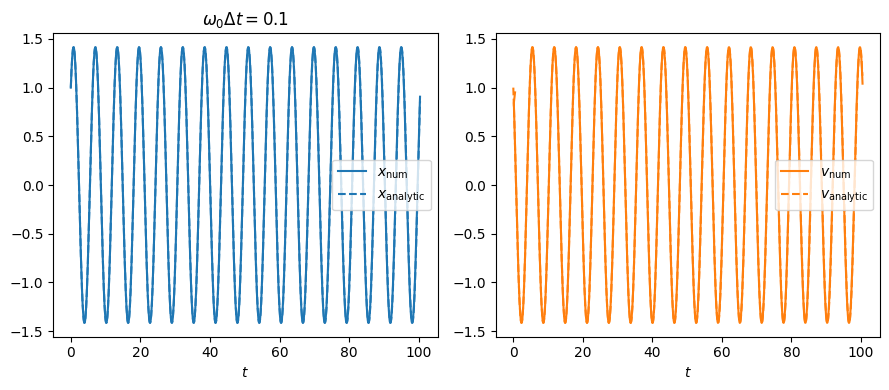

In [11]:
dt = 0.1 
omega_0 = 1
x_0 = 1
v_0 = 1
T = 16*2*np.pi


t_x, t_v, x_num, v_num = integrate_harmonic_oscillator_LF(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = dt, T = T)
t, x_analytic, v_analytic = analytical_solution(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = dt, T = T)

plt.figure(figsize = (9,4))
plt.subplot(1,2,1)
plt.title('$\omega_0 \Delta t = 0.1$')
plt.plot(t_x, x_num, c = 'C0', label = r'$x_\mathrm{num}$')
plt.plot(t, x_analytic, c = 'C0', ls = '--', label = r'$x_\mathrm{analytic}$')
plt.xlabel(r'$t$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(t_v, v_num, c = 'C1', label = r'$v_\mathrm{num}$')
plt.plot(t, v_analytic, c = 'C1', ls = '--', label = r'$v_\mathrm{analytic}$')
plt.xlabel(r'$t$')
plt.legend()

plt.tight_layout()

Notice how leap-frog is completely stable! We can push this for much longer periods!

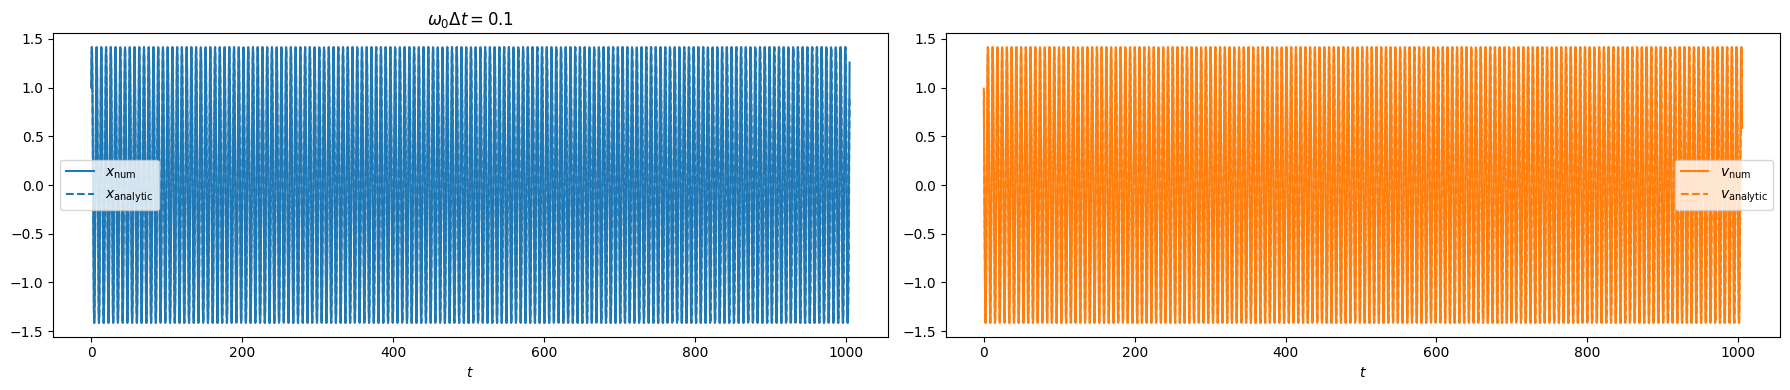

In [12]:
dt = 0.1
omega_0 = 1
x_0 = 1
v_0 = 1
T = 160*2*np.pi


t_x, t_v, x_num, v_num = integrate_harmonic_oscillator_LF(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = dt, T = T)
t, x_analytic, v_analytic = analytical_solution(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = dt, T = T)

plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
plt.title('$\omega_0 \Delta t = 0.1$')
plt.plot(t_x, x_num, c = 'C0', label = r'$x_\mathrm{num}$')
plt.plot(t, x_analytic, c = 'C0', ls = '--', label = r'$x_\mathrm{analytic}$')
plt.xlabel(r'$t$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(t_v, v_num, c = 'C1', label = r'$v_\mathrm{num}$')
plt.plot(t, v_analytic, c = 'C1', ls = '--', label = r'$v_\mathrm{analytic}$')
plt.xlabel(r'$t$')
plt.legend()

plt.tight_layout()

We can see that this numerical method is perfectly stable, the amplitude of the oscillation is perfectly conserved for many periods of oscillation, which is very difficult to ensure using Euler methods (which would require a prohibitively small time step). RK2 and RK4 perform better than Euler but they eventually also give rise to amplitude errors and instability for long enough integration times.

Recall in class, however, that the leap-frog method is "conditionally stable", meaning that it is stable for $\Delta t < 2/\omega_0 = 2$, for our parameters. In the example above we used $\Delta t = 0.1 < 2$, which satisfies this criterion. Let us see what happens when our time step is larger than this stability condition.

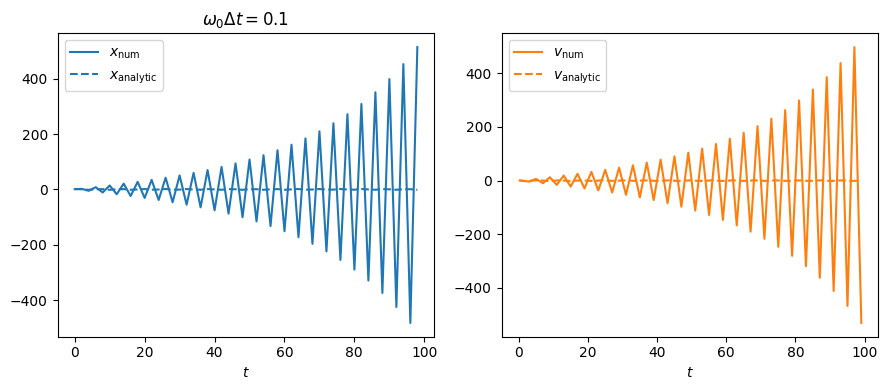

In [13]:
dt = 2.001 # using a time step slighltly larger than 2/omega_0 = 2
omega_0 = 1
x_0 = 1
v_0 = 1
T = 16*2*np.pi


t_x, t_v, x_num, v_num = integrate_harmonic_oscillator_LF(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = dt, T = T)
t, x_analytic, v_analytic = analytical_solution(x_0 = x_0, v_0 = v_0, omega_0 = omega_0, dt = dt, T = T)

plt.figure(figsize = (9,4))
plt.subplot(1,2,1)
plt.title('$\omega_0 \Delta t = 0.1$')
plt.plot(t_x, x_num, c = 'C0', label = r'$x_\mathrm{num}$')
plt.plot(t, x_analytic, c = 'C0', ls = '--', label = r'$x_\mathrm{analytic}$')
plt.xlabel(r'$t$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(t_v, v_num, c = 'C1', label = r'$v_\mathrm{num}$')
plt.plot(t, v_analytic, c = 'C1', ls = '--', label = r'$v_\mathrm{analytic}$')
plt.xlabel(r'$t$')
plt.legend()

plt.tight_layout()

As expected, we see instability when the timestep is too large. But this instability only appears when we use a very coarse $\Delta t$. At these large $\Delta t$'s we are not even resolving the oscillation period very well. 

### Suggested further work:
The amplitude of the oscillator is very well conserved in the leap-frog method as long as $\Delta t < \omega_0/2$. But what about errors in the phase of oscillation? In class we did numerical analysis of the leap-frog method and calculated the numerical frequency of oscillation of the harmonic oscillator. You can use that to quantify how much the numerical frequency of oscillation deviates from the true oscillation frequency, and how this deviation scales with $\Delta t$. You can then verify that calculation directly in a numerical experiment here in this notebook. The interested student is encouraged to try this.

## Summary

This notebook will have hopefully shown you how carefully desining your numerical method (or carefully choosing your numerical method) can have dramatic consequences on the types of solutions you obtain. We showed in direct numerical experiments 1) what a numerical instability looks like, 2) we measured the growth rate of the numerical instability and verified that it was consistent with our numerical analysis, and 3) we measured phase errors in the oscillation and verified it against numerical analysis as well. Finally, the leap-frog method, which is a time-reversible method, had some very nice properties: with very modest time step sizes, we obtained very accurate integration of the oscillation dynamics, conserving the amplitude of oscillation for very long integration times.